# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1: Dror Bakal 316116680

# Details Student 2: Shlomo serebrini 208947580

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

df_clean_text is a function that cleaning our text from : 
numeric numbers,Punctuation and non hebrew characters .


In [11]:
def df_clean_text(df_series):
    for indx in df_series.index:
        df_series["story"][indx] = re.sub(r'[^\u0590-\u05FF\s]', '', df_series["story"][indx])
        df_series["story"][indx] = re.sub(r'\d+|\.', '', df_series["story"][indx])
    return df_series

In [12]:
df_train = df_clean_text(df_train)
df_test = df_clean_text(df_test)

df_train.head(8)
df_test.shape

,story,gender
0,כשחבר הזמין אותי לחול לא באמת חשבתי שזה יקרה פ...,m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,כשהייתי ילד מטוסים היה הדבר שהכי ריתק אותי בתו...,m
4,הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכים...,f
5,לפני כ חודשים טסתי לרומא למשך שבוע טסתי במטוס ...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב הדירה הי...,f


(323, 2)

now we turn the text in 'gender' to numbers: 
male = 1 , female = 0

after that we build an pie graph to see Percentages in the graph for men and female.

([<matplotlib.patches.Wedge at 0x26bd07e0548>,
 [Text(0.14263080614858145, -1.090713735650838, '1'),
  Text(-0.1426308061485813, 1.090713735650838, '0')],
 [Text(0.07779862153558988, -0.594934764900457, '76.4%'),
  Text(-0.07779862153558981, 0.594934764900457, '23.6%')])

(-1.1054582738179903,
 1.1046053022494302,
 -1.1059711178292695,
 1.1254478326735193)

Text(0.5, 1.0, 'Gender Distribution')

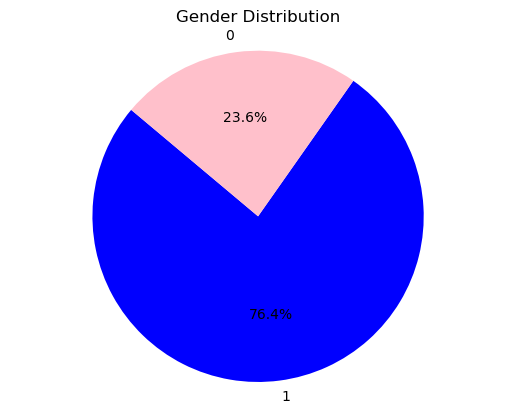

In [13]:
df_train['gender'] = np.where(df_train['gender'] == 'm', 1, 0)

X_train = df_train['story']
y_train = df_train['gender']
class_counts = y_train.value_counts()
labels = class_counts.index
colors = ['blue', 'pink']

plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()



now we use in count vectorizer that count for us the numbers of every word in the stories .

In [14]:
def get_count_vectorizer(df):
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(df['story'])
    return vectorizer

In [15]:
count_vectorizer = get_count_vectorizer(df_train)

print("Vocabulary:")
print(count_vectorizer.vocabulary_)

Vocabulary:
{'כשחבר': 18731, 'הזמין': 6464, 'אותי': 313, 'לחול': 20318, 'לא': 18925, 'באמת': 1363, 'חשבתי': 17038, 'שזה': 31887, 'יקרה': 17910, 'פשוט': 29110, 'אמרתי': 810, 'לו': 20153, 'כן': 18456, 'ותיארתי': 16169, 'לעצני': 21623, 'יתבטל': 18030, 'אחרי': 404, 'שבועיים': 30634, 'בערך': 3533, 'אני': 837, 'מקבל': 25595, 'טלפוןם': 17294, 'ממנו': 24832, 'שומע': 31830, 'מצאתי': 25477, 'אחלה': 389, 'מקודות': 25616, 'שנוטכל': 33330, 'טייל': 17215, 'בהם': 1820, 'ואז': 11013, 'הבנתי': 5580, 'הולך': 6295, 'לקרות': 21991, 'התחלתי': 10494, 'להתארגןם': 20001, 'על': 28294, 'דברים': 4745, 'ציוד': 29264, 'להליכה': 19721, 'תיקים': 34598, 'בגדים': 1582, 'חמים': 16919, 'כסף': 18496, 'ודרכון': 11779, 'מעודכן': 25203, 'לאחר': 19011, 'תכנונים': 34615, 'נפגשנו': 27217, 'בשדה': 4097, 'הוא': 6180, 'הביא': 5490, 'לי': 20541, 'את': 1141, 'אחד': 356, 'מהתיקים': 23695, 'שלו': 32651, 'כי': 18274, 'אין': 540, 'תיק': 34592, 'טוב': 17138, 'לטיולים': 20497, 'ועלינו': 15364, 'למטוס': 21011, 'לאיטליה': 19035, 'בטיסה': 2

now we train the models and check which one of them is the best : 
    (the models we use are : svm , naive bayes and linear svc)

In [16]:

X_train, X_val, y_train, y_val = train_test_split(df_train['story'], df_train['gender'], test_size=0.2, random_state=42)

count_vectorizer = get_count_vectorizer(df_train)

X_train_vec = count_vectorizer.transform(X_train)
X_val_vec = count_vectorizer.transform(X_val)

svm_model = SVC(kernel='linear', C=1.0)

svm_model.fit(X_train_vec, y_train)

y_pred = svm_model.predict(X_val_vec)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Validation Accuracy: 0.79


In [17]:
naive_bayes_model = MultinomialNB()

# Train the Naive Bayes model
naive_bayes_model.fit(X_train_vec, y_train)

# Make predictions on the validation set
y_pred = naive_bayes_model.predict(X_val_vec)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy (Naive Bayes): {accuracy:.2f}")

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Validation Accuracy (Naive Bayes): 0.73


In [18]:
linear_svc_model = LinearSVC()

# Train the LinearSVC model
linear_svc_model.fit(X_train_vec, y_train)

# Make predictions on the validation set
y_pred = linear_svc_model.predict(X_val_vec)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy (LinearSVC): {accuracy:.2f}")

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Validation Accuracy (LinearSVC): 0.79


In [19]:
df_train
# Create a CountVectorizer instance
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
# Initialize the LinearSVC model
linear_svc_model = LinearSVC()

# Train the LinearSVC model
linear_svc_model.fit(X_train_vec, y_train)

# Make predictions on the test set
X_test_vec = vectorizer.transform(df_test['story'])
y_test_pred = linear_svc_model.predict(X_test_vec)

# Create a DataFrame with the test predictions
df_predicted = pd.DataFrame({'test_example_id': df_test['test_example_id'], 'predicted_category': y_test_pred})

df_predicted

,story,gender
0,כשחבר הזמין אותי לחול לא באמת חשבתי שזה יקרה פ...,1
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,1
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,0
3,כשהייתי ילד מטוסים היה הדבר שהכי ריתק אותי בתו...,1
4,הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכים...,0
...,...,...
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,1
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,1
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,1
751,החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים ז...,0


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

,test_example_id,predicted_category
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
318,318,1
319,319,1
320,320,1
321,321,1


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [20]:
df_predicted.to_csv('classification_results.csv',index=False)